<a href="https://colab.research.google.com/github/buzzaggwd/NLP/blob/main/nlp_lab5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import math

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, v_measure_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
PATH_TO_FILE: str = 'fake_news_dataset2.csv'

df = pd.read_csv(PATH_TO_FILE, encoding='utf-8')

print(df)

# p.s. датасет был ну очень огромный, пришлось обрезать до 500 строк, зато я могу его обработать🥲

                                                  text       category
0    more tax development both store agreement lawy...       Politics
1    probably guess western behind likely next inve...       Politics
2    them identify forward present success risk sev...       Business
3    phone which item yard Republican safe where po...        Science
4    wonder myself fact difficult course forget exa...     Technology
..                                                 ...            ...
495  bed Congress very here do talk benefit populat...         Health
496  eight for remain affect defense too treat teac...  Entertainment
497  whom culture despite share ago partner us pers...       Politics
498  someone know wish science sure strategy walk n...  Entertainment
499  thought value identify part realize everyone j...        Science

[500 rows x 2 columns]


In [4]:
lemmatizer = WordNetLemmatizer()
english_stopwords = stopwords.words('english')

In [5]:
# удаляем стоп-слова, делаем нижний регистр, разделяем слова
def preprocessing(texts: list[str]) -> list[list[str]]:
    processed = []
    for text in texts:
        clean_text = re.sub(r'[^a-z\s]', '', text.lower())
        words = clean_text.split()
        processed.append(words)
    return processed

processed_texts = preprocessing(df['text'].tolist())
print(processed_texts[10])

['design', 'quality', 'get', 'student', 'ground', 'public', 'still', 'whose', 'cultural', 'young', 'many', 'material', 'audience', 'smile', 'ever', 'unit', 'approach', 'although', 'sure', 'me', 'assume', 'remember', 'down', 'see', 'serious', 'person', 'training', 'agent', 'simple', 'enjoy', 'anyone', 'opportunity', 'buy', 'school', 'technology', 'stock', 'enough', 'late', 'former', 'ask', 'experience', 'interesting', 'part', 'mean', 'expect', 'range', 'decision', 'can', 'how', 'answer', 'then', 'way', 'where', 'water', 'good', 'plan', 'they', 'still', 'father', 'notice', 'military', 'away', 'student', 'care', 'fear', 'address', 'relationship', 'establish', 'yet', 'rate', 'turn', 'hospital', 'step', 'soon', 'when', 'set', 'lot', 'natural', 'majority', 'pull', 'far', 'late', 'government', 'sure', 'production', 'agency', 'start', 'stock', 'wonder', 'interview', 'yet', 'science', 'cause', 'project', 'add', 'respond', 'energy', 'thus', 'tonight', 'director', 'low', 'the', 'pick', 'speak', '

In [6]:
# лемматизация
def lemmatization(texts: list[list[str]]) -> list[list[str]]:
    lemmatized = []
    for sublist in texts:
        current_lemmas = []
        for word in sublist:
            if word not in english_stopwords:
                lemma = lemmatizer.lemmatize(word)
                current_lemmas.append(lemma)
        lemmatized.append(current_lemmas)
    return lemmatized

final_texts = lemmatization(processed_texts)
print(final_texts[10])

['design', 'quality', 'get', 'student', 'ground', 'public', 'still', 'whose', 'cultural', 'young', 'many', 'material', 'audience', 'smile', 'ever', 'unit', 'approach', 'although', 'sure', 'assume', 'remember', 'see', 'serious', 'person', 'training', 'agent', 'simple', 'enjoy', 'anyone', 'opportunity', 'buy', 'school', 'technology', 'stock', 'enough', 'late', 'former', 'ask', 'experience', 'interesting', 'part', 'mean', 'expect', 'range', 'decision', 'answer', 'way', 'water', 'good', 'plan', 'still', 'father', 'notice', 'military', 'away', 'student', 'care', 'fear', 'address', 'relationship', 'establish', 'yet', 'rate', 'turn', 'hospital', 'step', 'soon', 'set', 'lot', 'natural', 'majority', 'pull', 'far', 'late', 'government', 'sure', 'production', 'agency', 'start', 'stock', 'wonder', 'interview', 'yet', 'science', 'cause', 'project', 'add', 'respond', 'energy', 'thus', 'tonight', 'director', 'low', 'pick', 'speak', 'spend', 'wear', 'certain', 'rule', 'happen', 'provide', 'leave', 'sh

In [7]:
# векторизация
texts_for_vectorization = [' '.join(tokens) for tokens in final_texts]

In [8]:
# TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(texts_for_vectorization)
print("Матрица TF-IDF (размерность):", X.shape)

Матрица TF-IDF (размерность): (500, 867)


In [9]:
# кластеризация
n_clusters = df['category'].nunique()
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

In [10]:
# сравнение с реальной разметкой
true_labels = df['category'].values
ari = adjusted_rand_score(true_labels, clusters)
v_measure = v_measure_score(true_labels, clusters)
print(f"Качество кластеризации:\nARI: {ari:.2f}\nV-measure: {v_measure:.2f}")

Качество кластеризации:
ARI: -0.00
V-measure: 0.02


In [11]:
# выборки
X_train, X_test, y_train, y_test = train_test_split(X, true_labels, test_size=0.2, random_state=42, stratify=true_labels)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

print("Размеры выборок:")
print(f"Train: {X_train.shape[0]}, Val: {X_val.shape[0]}, Test: {X_test.shape[0]}")

Размеры выборок:
Train: 300, Val: 100, Test: 100


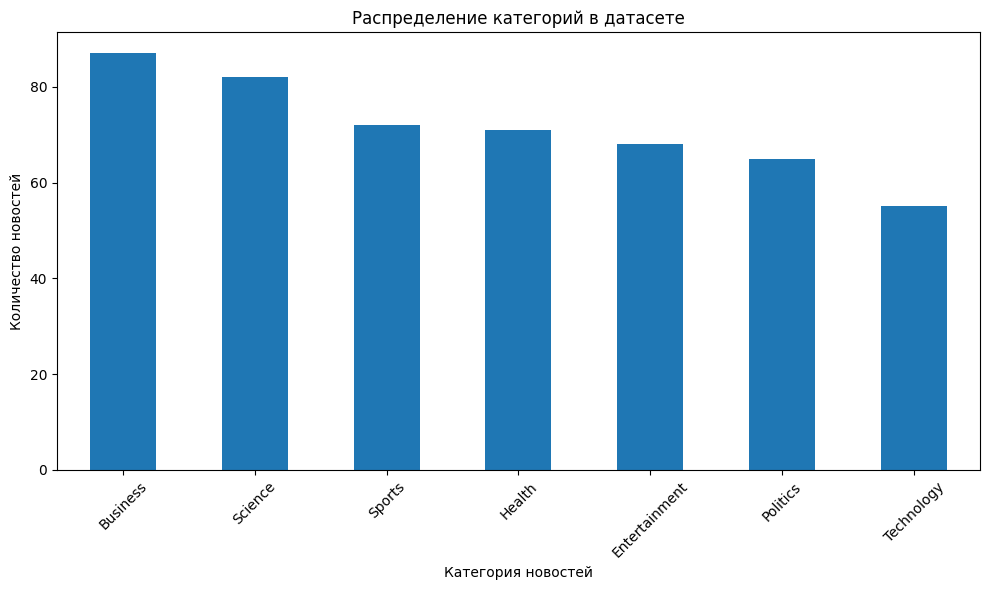

In [12]:
plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar')
plt.title('Распределение категорий в датасете')
plt.xlabel('Категория новостей')
plt.ylabel('Количество новостей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("fill-mask", model="distilbert/distilbert-base-uncased")

# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("distilbert/distilbert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


In [16]:
#!pip install transformers datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.9 MB/s eta 0:00:00


In [18]:
from transformers import AutoTokenizer
from datasets import Dataset
import pandas as pd

# Загрузка данных (предполагается, что df уже определен)
# df = pd.read_csv('fake_news_dataset2.csv')

# Преобразование данных в формат Hugging Face Dataset
dataset = Dataset.from_pandas(df.rename(columns={'text': 'text', 'category': 'label'}))

# Токенизация
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=512)

tokenized_ds = dataset.map(tokenize_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [19]:
from sklearn.model_selection import train_test_split

# Разделение исходного датасета (перед токенизацией)
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['category'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['category'])

# Преобразование в Dataset Hugging Face
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Токенизация разбитых датасетов
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)
tokenized_test = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

In [28]:
!pip install --upgrade transformers

In [24]:
!pip install hf_xet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 55.4 MB/s eta 0:00:00


In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import (
    DistilBertForSequenceClassification,
    DistilBertTokenizer,
    Trainer,
    TrainingArguments
)
from datasets import Dataset
import os

# Отключаем W&B
os.environ["WANDB_DISABLED"] = "true"

# 1. Загрузка данных
df = pd.read_csv('fake_news_dataset2.csv', encoding='utf-8')
le = LabelEncoder()
df['label'] = le.fit_transform(df['category'])

# 2. Разделение данных
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

# 3. Подготовка Dataset
train_dataset = Dataset.from_pandas(train_df[['text', 'label']])
val_dataset = Dataset.from_pandas(val_df[['text', 'label']])
test_dataset = Dataset.from_pandas(test_df[['text', 'label']])

# 4. Токенизация
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=512)

tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)
tokenized_test = test_dataset.map(tokenize_function, batched=True)

# 5. Явное добавление меток
tokenized_train = tokenized_train.add_column('labels', train_df['label'].tolist())
tokenized_val = tokenized_val.add_column('labels', val_df['label'].tolist())
tokenized_test = tokenized_test.add_column('labels', test_df['label'].tolist())

# 6. Загрузка модели
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=len(le.classes_)
)

# 7. Минимальные параметры обучения (совместимые с любой версией)
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_steps=100,
    save_steps=100
)

# 8. Обучение с ручной оценкой
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
)

trainer.train()

# 9. Оценка после обучения
results = trainer.evaluate(tokenized_test)
print("Test Results:", results)

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/datasets/table.py:1395: FutureWarning: promote has been superseded by promote_options='default'.
  """Create `ConcatenationTable` from list of tables.
/usr/local/lib/python3.11/dist-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  result: list[list[TableBlock]], blocks: list[list[TableBlock]]
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
100,1.956300


Test Results: {'eval_loss': 1.934648871421814, 'eval_runtime': 44.8877, 'eval_samples_per_second': 1.114, 'eval_steps_per_second': 0.156, 'epoch': 3.0}


In [ ]:
# Оценка на тестовой выборке
test_results = trainer.evaluate(tokenized_test)
print("Тестовые результаты:", test_results)

# Предсказания
predictions = trainer.predict(tokenized_test)
pred_labels = label_list[np.argmax(predictions.predictions, axis=1)]